# TMY versus Single-Year

TMYs are built from monthly segments pulled from actual (single-year) data.  As such, one might expect each month in a TMY dataset to be identical to the same month in the corresponding single-year data.  This notebook demonstrates that this expectation does not exactly hold for PSM3.

In [1]:
import pvlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, let's fetch a normal TMY file.  I specify `names='tmy-2020'` so that this notebook fetches the same TMY data in the future.

In [2]:
kwargs = dict(latitude=40, longitude=-80, api_key='DEMO_KEY', email='assessingsolar@gmail.com',
              map_variables=True, leap_day=True)
real_tmy = pvlib.iotools.get_psm3(names='tmy-2020', **kwargs)[0].drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [3]:
real_tmy.head(10)

pressure  albedo  wind_speed  temp_air  Dew Point  \
1999-01-01 00:30:00-05:00     970.0    0.87         0.6      -6.0      -10.0   
1999-01-01 01:30:00-05:00     970.0    0.87         0.6      -7.0      -10.0   
1999-01-01 02:30:00-05:00     970.0    0.87         0.6      -7.0      -11.0   
1999-01-01 03:30:00-05:00     970.0    0.87         0.6      -7.0      -12.0   
1999-01-01 04:30:00-05:00     970.0    0.87         0.6      -7.0      -12.0   
1999-01-01 05:30:00-05:00     970.0    0.87         0.6      -8.0      -13.0   
1999-01-01 06:30:00-05:00     970.0    0.87         0.6      -8.0      -13.0   
1999-01-01 07:30:00-05:00     970.0    0.87         0.6      -8.0      -14.0   
1999-01-01 08:30:00-05:00     980.0    0.87         0.6      -8.0      -14.0   
1999-01-01 09:30:00-05:00     980.0    0.87         0.6      -7.0      -14.0   

                             dni    ghi  wind_direction   dhi  
1999-01-01 00:30:00-05:00    0.0    0.0           256.0   0.0  
1999-01-01 01:30:00-05:00    0.0    0.0           258.0   0.0  
1999-01-01 02:30:00-05:00    0.0    0.0           262.0   0.0  
1999-01-01 03:30:00-05:00    0.0    0.0           265.0   0.0  
1999-01-01 04:30:00-05:00    0.0    0.0           270.0   0.0  
1999-01-01 05:30:00-05:00    0.0    0.0           275.0   0.0  
1999-01-01 06:30:00-05:00    0.0    0.0           280.0   0.0  
1999-01-01 07:30:00-05:00    0.0    0.0           280.0   0.0  
1999-01-01 08:30:00-05:00  497.0   98.0           279.0  39.0  
1999-01-01 09:30:00-05:00  712.0  258.0           283.0  72.0

Now, let's build the same TMY using the corresponding single-year data:

In [4]:
dfs = []
for year in np.unique(real_tmy.index.year):
    dfs.append(pvlib.iotools.get_psm3(names=year, **kwargs)[0].drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute']))

df = pd.concat(dfs)
fake_tmy = df.reindex(real_tmy.index)

In [5]:
fake_tmy.head(10)

pressure  albedo  wind_speed  temp_air  Dew Point  \
1999-01-01 00:30:00-05:00     970.0   0.866         0.6      -6.0      -10.0   
1999-01-01 01:30:00-05:00     970.0   0.866         0.6      -7.0      -10.0   
1999-01-01 02:30:00-05:00     970.0   0.866         0.6      -7.0      -11.0   
1999-01-01 03:30:00-05:00     970.0   0.866         0.6      -7.0      -12.0   
1999-01-01 04:30:00-05:00     970.0   0.866         0.6      -7.0      -12.0   
1999-01-01 05:30:00-05:00     970.0   0.866         0.6      -8.0      -13.0   
1999-01-01 06:30:00-05:00     970.0   0.866         0.6      -8.0      -13.0   
1999-01-01 07:30:00-05:00     970.0   0.866         0.6      -8.0      -14.0   
1999-01-01 08:30:00-05:00     980.0   0.866         0.6      -8.0      -14.0   
1999-01-01 09:30:00-05:00     980.0   0.866         0.6      -7.0      -14.0   

                             dni    ghi  wind_direction   dhi  
1999-01-01 00:30:00-05:00    0.0    0.0           256.3   0.0  
1999-01-01 01:30:00-05:00    0.0    0.0           258.3   0.0  
1999-01-01 02:30:00-05:00    0.0    0.0           261.5   0.0  
1999-01-01 03:30:00-05:00    0.0    0.0           265.1   0.0  
1999-01-01 04:30:00-05:00    0.0    0.0           269.7   0.0  
1999-01-01 05:30:00-05:00    0.0    0.0           275.0   0.0  
1999-01-01 06:30:00-05:00    0.0    0.0           279.6   0.0  
1999-01-01 07:30:00-05:00    0.0    0.0           280.4   0.0  
1999-01-01 08:30:00-05:00  497.0   98.0           279.4  39.0  
1999-01-01 09:30:00-05:00  712.0  258.0           283.2  72.0

Right away we can see that `wind_direction` is somewhat different. Note also that `albedo` is different, although it's a precision difference rather than truly different values.  Let's take a broader look:

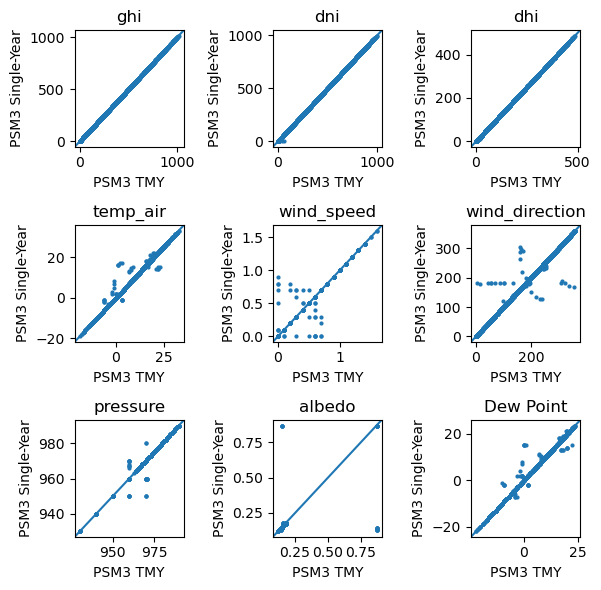

In [6]:
columns = ['ghi', 'dni', 'dhi', 'temp_air', 'wind_speed',
           'wind_direction', 'pressure', 'albedo', 'Dew Point']

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
axes = axes.ravel()

for ax, col in zip(axes, columns):
    ax.scatter(real_tmy[col], fake_tmy[col], s=4)
    ax.set_title(col)
    ax.set_xlabel("PSM3 TMY")
    ax.set_ylabel("PSM3 Single-Year")
    x = real_tmy[col].mean()
    ax.axline((x, x), slope=1)

fig.tight_layout()

How often do the values not match up?

In [7]:
(real_tmy != fake_tmy)[columns].mean()

ghi               0.000228
dni               0.000228
dhi               0.000228
temp_air          0.005594
wind_speed        0.003995
wind_direction    0.499543
pressure          0.003653
albedo            0.792922
Dew Point         0.006279
dtype: float64

And what about just during the daytime?

In [8]:
mask = real_tmy['ghi'] > 0
(real_tmy.loc[mask] != fake_tmy.loc[mask])[columns].mean()

ghi               0.000460
dni               0.000460
dhi               0.000460
temp_air          0.000230
wind_speed        0.000230
wind_direction    0.412319
pressure          0.000230
albedo            0.774764
Dew Point         0.000460
dtype: float64

In [9]:
%load_ext watermark
%watermark --iversions -u -d -t

Last updated: 2022-10-16 17:29:59

pandas    : 1.5.0
matplotlib: 3.5.2
numpy     : 1.22.3
pvlib     : 0.9.3

